In [1]:
import config # .gitignore
import numpy as np
import pandas as pd
from getdata import *



In [2]:
accu = []
algr = ['LightGBM', 'XGBoost', 'Naive Bayes', 'LDA','Logistic Regression', 'KNN', 'SVM','Decision Tree','Random Forest','AdaBoost','SGD','Dummy']

In [3]:
# lightGBM decision tree
import lightgbm as lgb

clf0 = lgb.LGBMClassifier()
clf0.fit(X_train, Y_train)
y_pred=clf0.predict(X_test)

# Accuracy
a = clf0.score(X_test, Y_test)
accu.append(a)


In [4]:
# XGboost
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [5]:
# Navie Bayes Classifier
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [6]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)  

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [7]:
# Logistic regression (LR)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


/Users/peiyangliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [9]:
# SVM
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [10]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [11]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


In [12]:
# Adaptive Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)

In [13]:
# SGD
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


/Users/peiyangliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [14]:
# Rule-based classification
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy="most_frequent")
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)

# Accuracy
a = clf.score(X_test, Y_test)
accu.append(a)


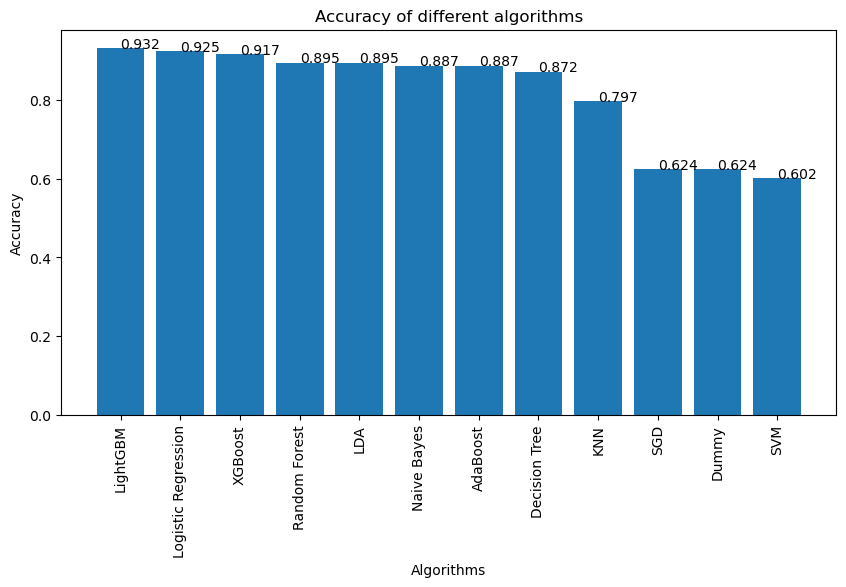

In [15]:
# plot in descending order
accu, algr = zip(*sorted(zip(accu, algr), reverse=True))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(algr,accu)
plt.xticks(rotation=90)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i],3),round(y[i],3))
addlabels(algr, accu)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of different algorithms')
plt.show()







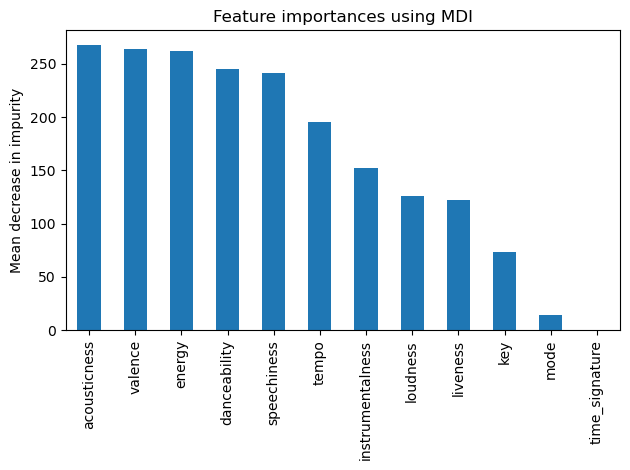

In [16]:
# XGBoost feature importance
importance = clf0.feature_importances_

dt_importances = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
dt_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [17]:
# https://link.springer.com/article/10.1007/s42979-021-00592-x